# CPU vs GPU

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [4]:
X_train.shape, Y_train.shape, X_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1))

In [5]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [6]:
# 모델 설정
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
# 모델 학습
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 10, batch_size = 200)

Epoch 1/10
240/240 [==============================] - 24s 14ms/step - loss: 0.6066 - accuracy: 0.8090 - val_loss: 0.0716 - val_accuracy: 0.9796
Epoch 2/10
240/240 [==============================] - 3s 11ms/step - loss: 0.1042 - accuracy: 0.9685 - val_loss: 0.0544 - val_accuracy: 0.9841
Epoch 3/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0676 - accuracy: 0.9798 - val_loss: 0.0456 - val_accuracy: 0.9867
Epoch 4/10
240/240 [==============================] - 3s 11ms/step - loss: 0.0602 - accuracy: 0.9804 - val_loss: 0.0404 - val_accuracy: 0.9882
Epoch 5/10
240/240 [==============================] - 3s 11ms/step - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.0394 - val_accuracy: 0.9887
Epoch 6/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0420 - accuracy: 0.9870 - val_loss: 0.0389 - val_accuracy: 0.9891
Epoch 7/10
240/240 [==============================] - 3s 12ms/step - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.0355 - val_accuracy: 0.989

In [8]:
# 테스트 정확도
acc = model.evaluate(X_test, Y_test, verbose=0)[1]
acc

0.9902999997138977

### Visualization

In [9]:
# 학습셋의 오차
y_loss = history.history['loss']

# 학습셋의 정확도
y_acc = history.history['accuracy']

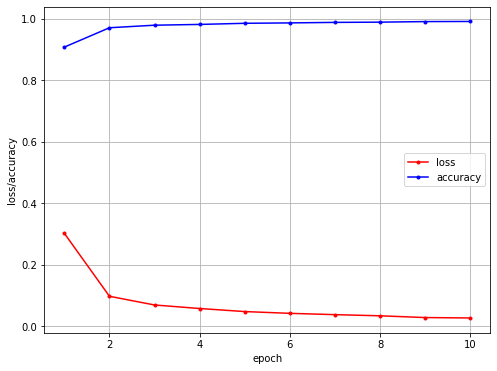

In [10]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss) + 1)
plt.figure(figsize = (8,6))
plt.plot(x_len, y_loss, marker = '.', c = "red", label = 'loss')
plt.plot(x_len, y_acc, marker = '.', c = "blue", label = 'accuracy')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc = 'center right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/accuracy')
plt.show()

## GPU

In [11]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11382830775169673327
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14509932544
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2205303115631129676
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [12]:
!nvidia-smi

Tue Jun 29 05:04:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |   1246MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------